# K-Means vs Gaussian Mixture Models — Clustering Tutorial

**Student Name:** Dekshina Udayan  
**Student ID:** 24068646  
**GitHub Repository:** https://github.com/dekshinaudayan/kmeans-GMM-clustering-tutorial


# K-Means vs Gaussian Mixture Models (GMM)

This notebook demonstrates and compares K-Means and Gaussian Mixture Models for clustering,
including:
- Basic clustering behaviour
- Visual differences between K-Means and GMM
- Choosing the number of clusters (K)
- A failure case where K-Means struggles but GMM works better


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from matplotlib.patches import Ellipse


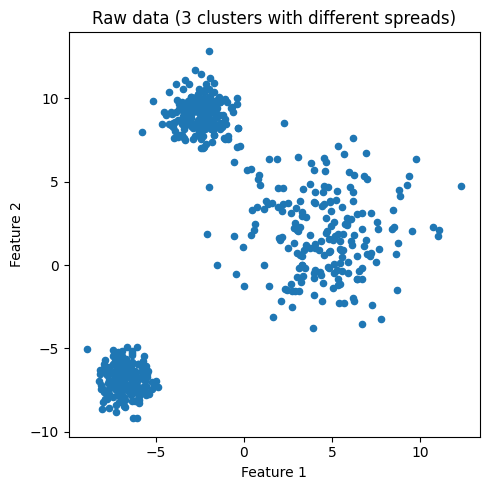

In [2]:
X, y_true = make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=[1.0, 2.5, 0.8],
    random_state=42
)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Raw data (3 clusters with different spreads)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


In [3]:
# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
kmeans_centers = kmeans.cluster_centers_


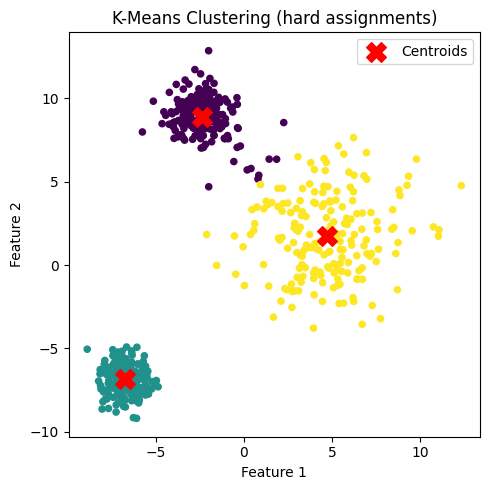

In [4]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="viridis", s=20)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering (hard assignments)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
def draw_ellipse(mean, cov, ax, **kwargs):
    """
    Draw an ellipse representing a 2D Gaussian with given mean and covariance.
    Works across Matplotlib versions.
    """
    # Eigenvalues and eigenvectors
    vals, vecs = np.linalg.eigh(cov)

    # Sort eigenvalues
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Angle of the largest eigenvector
    angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Width and height
    width, height = 2 * np.sqrt(vals)

    ell = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ell)


In [6]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(
    n_components=3,
    covariance_type="full",
    random_state=42
)
gmm_labels = gmm.fit_predict(X)
gmm_means = gmm.means_
gmm_covs = gmm.covariances_


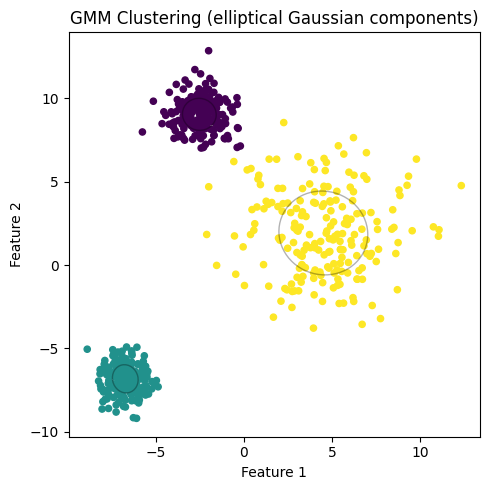

In [7]:
plt.figure(figsize=(5, 5))
ax = plt.gca()

# Points coloured by GMM cluster label
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap="viridis", s=20)

# Ellipses for each Gaussian component
for mean, cov in zip(gmm_means, gmm_covs):
    draw_ellipse(mean, cov, ax=ax, edgecolor="black",
                 facecolor="none", alpha=0.3)

plt.title("GMM Clustering (elliptical Gaussian components)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


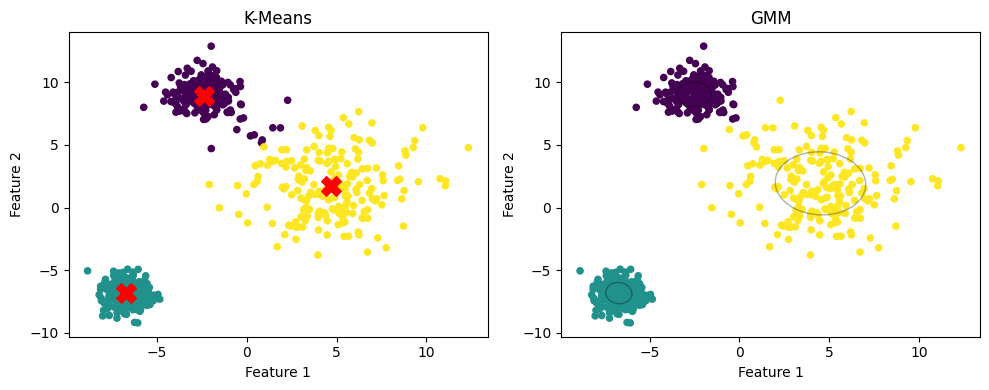

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# K-Means
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="viridis", s=20)
axes[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1],
                c="red", marker="X", s=200)
axes[0].set_title("K-Means")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# GMM
axes[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap="viridis", s=20)
for mean, cov in zip(gmm_means, gmm_covs):
    draw_ellipse(mean, cov, ax=axes[1], edgecolor="black",
                 facecolor="none", alpha=0.3)
axes[1].set_title("GMM")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


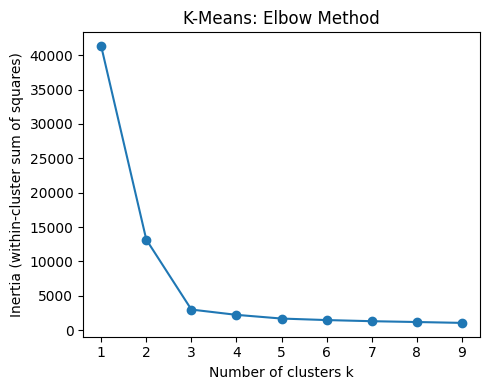

In [9]:
inertias = []
Ks = range(1, 10)

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(5, 4))
plt.plot(Ks, inertias, marker="o")
plt.xticks(Ks)
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("K-Means: Elbow Method")
plt.tight_layout()
plt.show()


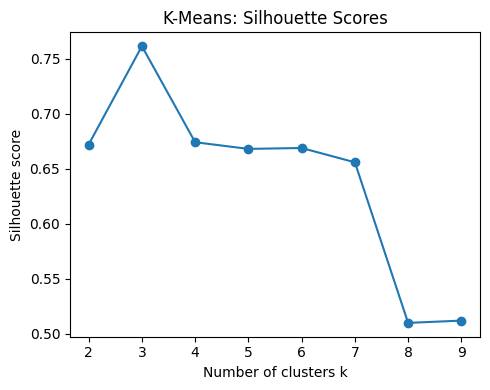

In [10]:
sil_scores = []
Ks_sil = range(2, 10)

for k in Ks_sil:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = km.fit_predict(X)
    sil = silhouette_score(X, labels_k)
    sil_scores.append(sil)

plt.figure(figsize=(5, 4))
plt.plot(Ks_sil, sil_scores, marker="o")
plt.xticks(Ks_sil)
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("K-Means: Silhouette Scores")
plt.tight_layout()
plt.show()


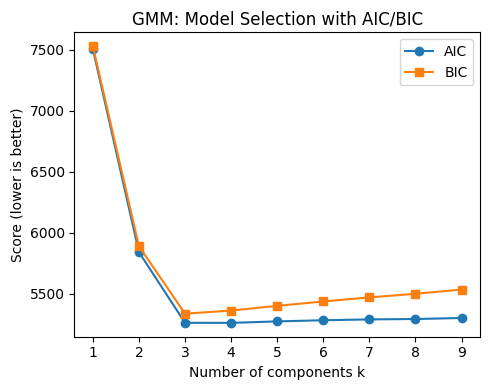

In [11]:
aics = []
bics = []

for k in Ks:
    g = GaussianMixture(
        n_components=k,
        covariance_type="full",
        random_state=42
    )
    g.fit(X)
    aics.append(g.aic(X))
    bics.append(g.bic(X))

plt.figure(figsize=(5, 4))
plt.plot(Ks, aics, marker="o", label="AIC")
plt.plot(Ks, bics, marker="s", label="BIC")
plt.xticks(Ks)
plt.xlabel("Number of components k")
plt.ylabel("Score (lower is better)")
plt.title("GMM: Model Selection with AIC/BIC")
plt.legend()
plt.tight_layout()
plt.show()


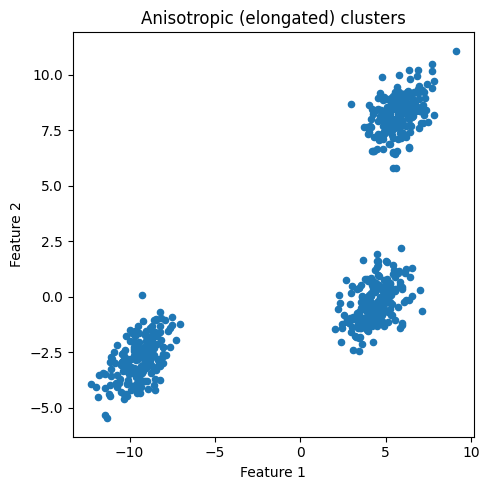

In [12]:
# Create isotropic blobs
X_iso, _ = make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

# Linear transformation
transform = np.array([[0.6, -0.4],
                      [0.8,  0.8]])
X_aniso = X_iso.dot(transform)

plt.figure(figsize=(5, 5))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=20)
plt.title("Anisotropic (elongated) clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


In [13]:
# K-Means on anisotropic data
km_aniso = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km_aniso = km_aniso.fit_predict(X_aniso)

# GMM on anisotropic data
gmm_aniso = GaussianMixture(
    n_components=3,
    covariance_type="full",
    random_state=42
)
labels_gmm_aniso = gmm_aniso.fit_predict(X_aniso)
means_aniso = gmm_aniso.means_
covs_aniso = gmm_aniso.covariances_


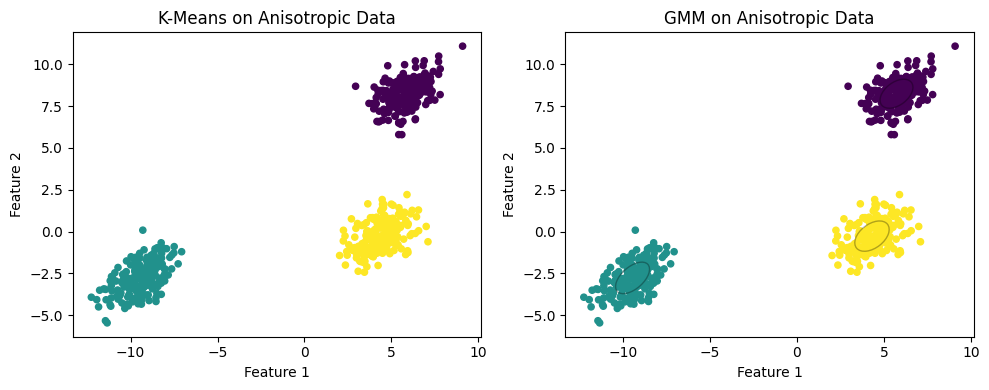

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left: K-Means
axes[0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels_km_aniso,
                cmap="viridis", s=20)
axes[0].set_title("K-Means on Anisotropic Data")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Right: GMM
axes[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels_gmm_aniso,
                cmap="viridis", s=20)
for mean, cov in zip(means_aniso, covs_aniso):
    draw_ellipse(mean, cov, ax=axes[1],
                 edgecolor="black", facecolor="none", alpha=0.3)
axes[1].set_title("GMM on Anisotropic Data")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()
